In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import scipy.ndimage as ndimage
from astropy.visualization import simple_norm
from photutils.detection import find_peaks
import photutils.psf as psf

import stuff
# import fwhm
import importlib

/Users/oscar/LB/grav_lens/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


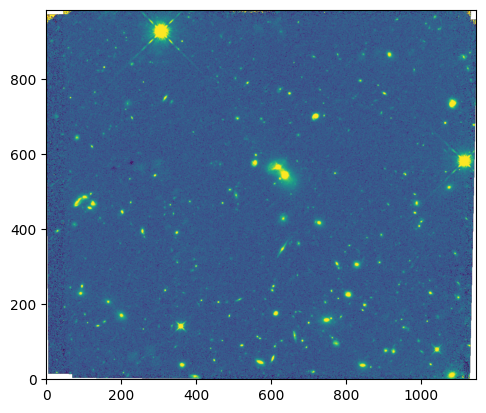

In [15]:
# replace with your file
f=fits.open('/Users/oscar/LB/grav_lens/test_images/Desi/ifjj02010_drz.fits') 
imR=f[1].data
f.close()
imR[imR<0]=0
norm = simple_norm(imR, 'sqrt', percent=99.)
plt.imshow(imR, norm=norm, origin='lower', cmap='viridis')


In [16]:
# change threshold value
peaks_tbl = find_peaks(imR, threshold=40, box_size=20)  
peaks_tbl['peak_value'].info.format = '%.8g'
print(peaks_tbl)  

 id x_peak y_peak peak_value
--- ------ ------ ----------
  1   1040     78  110.94526
  2    359    140  399.19693
  3   1114    580   3275.501
  4    306    926  6888.0835
  5   1144    951  57.685383
  6      1    959  62.488758
  7     47    974  70.544769
  8   1126    977    62.0382
  9   1127    977    62.0382
 10    553    979  57.660187
...    ...    ...        ...
 14    518    982  50.347607
 15    538    982  51.856377
 16    568    982  74.745575
 17    610    982   54.71965
 18    501    983  72.973846
 19    518    983  50.347607
 20    538    983  51.856377
 21    568    983  74.745575
 22    593    983  97.154915
 23    610    983   54.71965
Length = 23 rows


4 stars


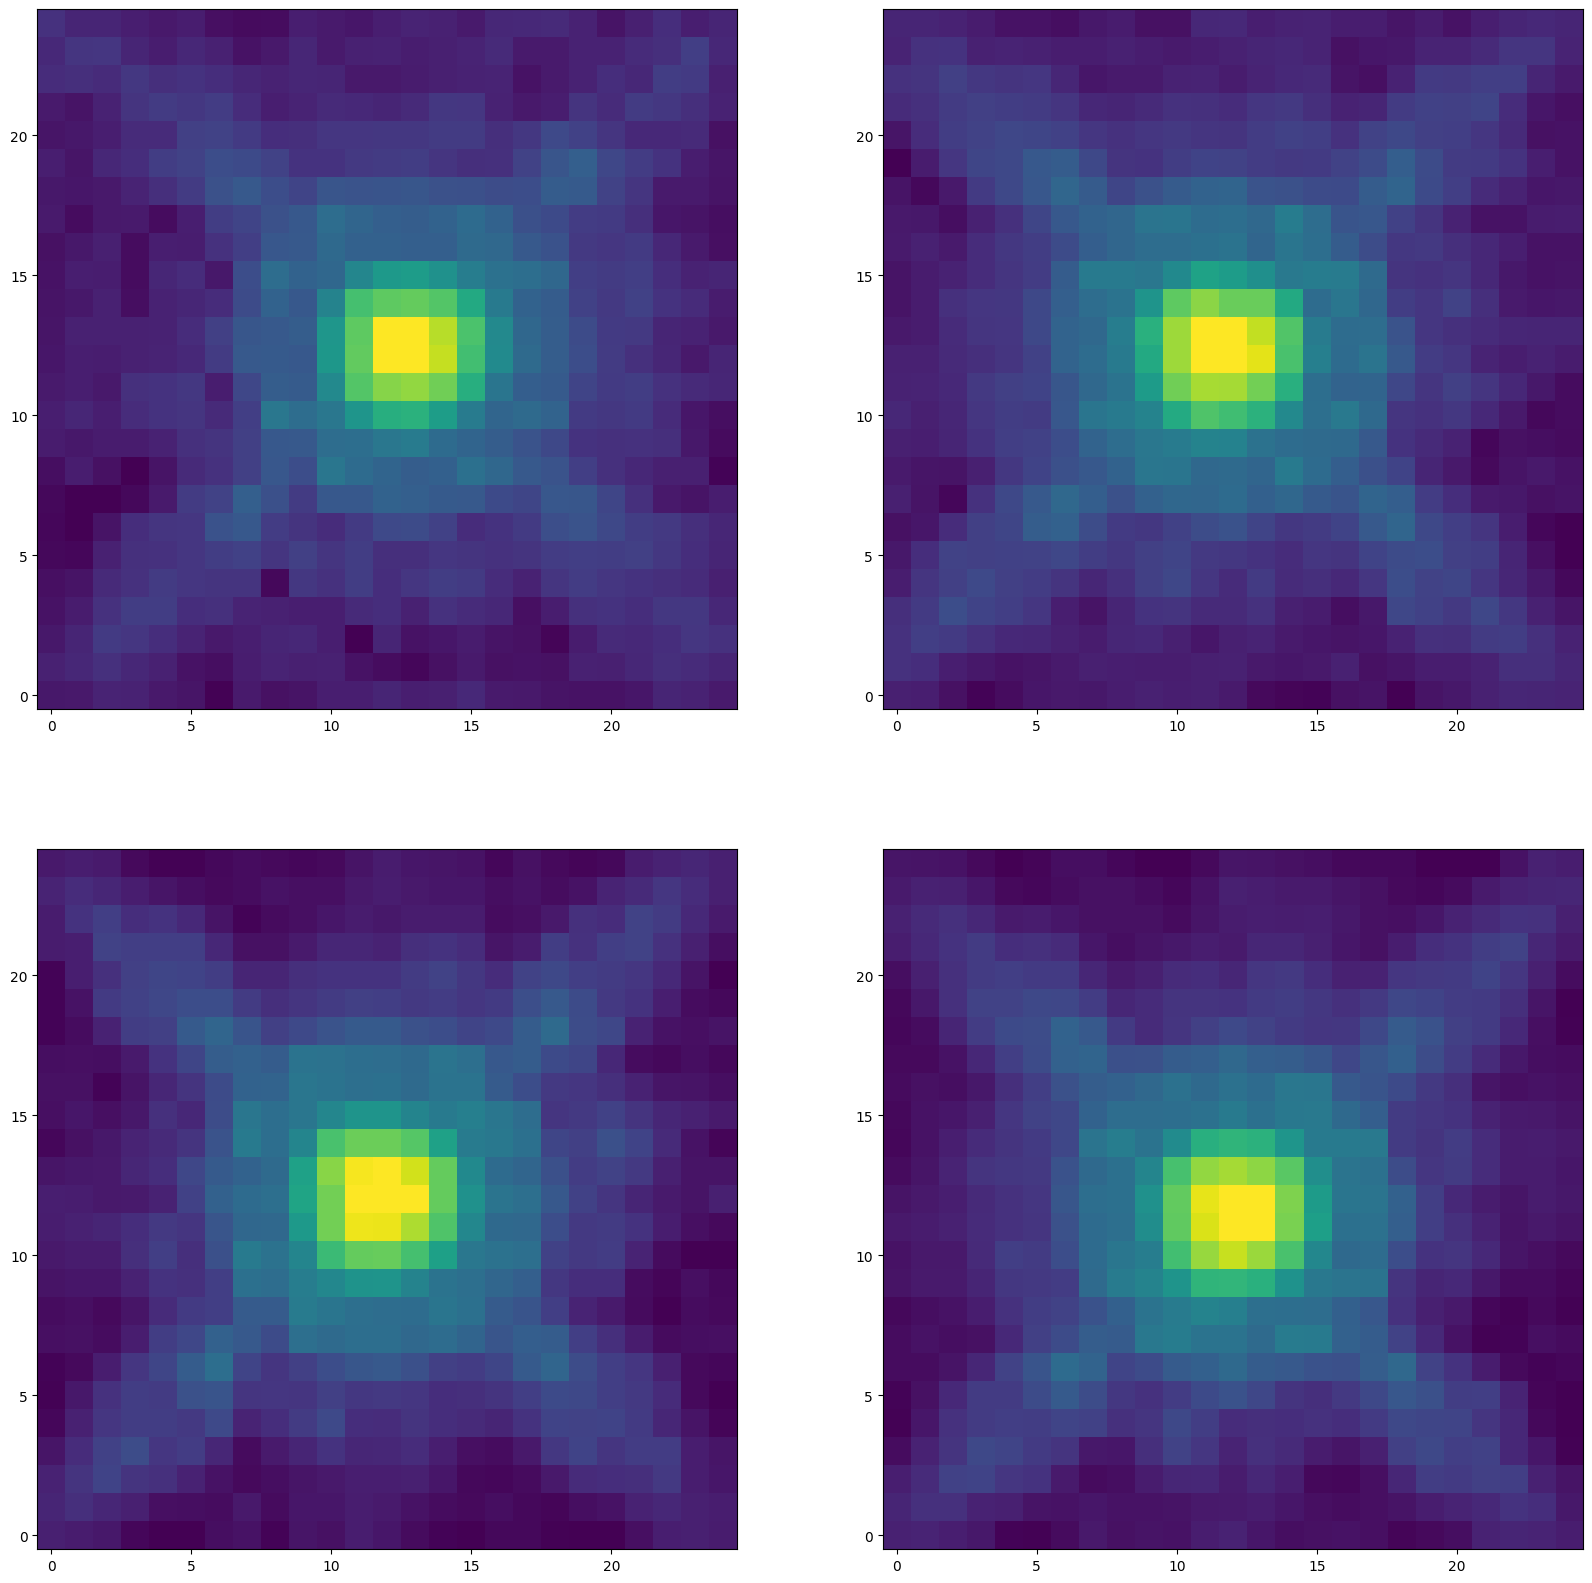

In [17]:
stars = stuff.coordsToStars(imR, peaks_tbl)

In [19]:
len(stars)

4

EPSFBuilder (10 maxiters):  70%|███████   | 7/10 [00:00<00:00, 68.78it/s]

EPSFBuilder converged after 7 iterations (of 10 maximum iterations)


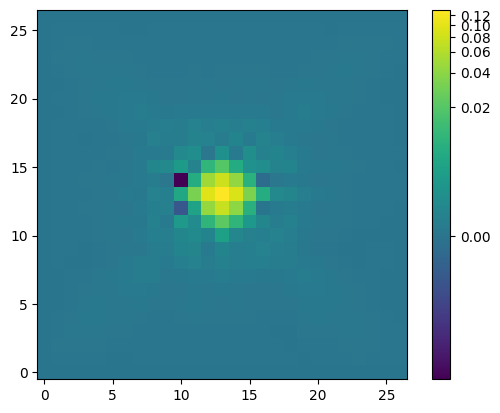

In [21]:
#look at the output above and decide which ones you want
starsIWant = np.r_[5:14]

builder= psf.EPSFBuilder(maxiters=10,oversampling=1)
epsf, fitted_stars = builder.build_epsf(stars)#[5:14])

norm = simple_norm(epsf.data, 'log', percent=100.0)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

pee_ess_eff = fits.PrimaryHDU(epsf.data)
pee_ess_eff.writeto('psf350.fits',overwrite=True)